In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clean-mindpetal-wmata-ridership-summary/Clean Mindpetal WMATA_Ridership_Summary Kavin M.csv


In [2]:
#create dataframe, which has the provided ridership data plus a newly added 'Date' column
mindpetal_metro = pd.read_csv('/kaggle/input/clean-mindpetal-wmata-ridership-summary/Clean Mindpetal WMATA_Ridership_Summary Kavin M.csv')

In [3]:
# look at first few rows of data
mindpetal_metro.head()

,Station Name,Time Period,Avg Daily Entries,Date
0,Woodley Park,AM Peak (Open-9:30am),1.4,3/6/2024
1,Wiehle-Reston East,AM Peak (Open-9:30am),1.1,3/6/2024
2,Wheaton,AM Peak (Open-9:30am),1.1,3/6/2024
3,West Hyattsville,AM Peak (Open-9:30am),1.5,3/6/2024
4,West Falls Church,AM Peak (Open-9:30am),0.9,3/6/2024


In [4]:
#look at the number of rows, data type, and look for any null values
mindpetal_metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3894 entries, 0 to 3893
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Station Name       3894 non-null   object 
 1   Time Period        3894 non-null   object 
 2   Avg Daily Entries  3894 non-null   float64
 3   Date               3894 non-null   object 
dtypes: float64(1), object(3)
memory usage: 121.8+ KB


In [5]:
#convert Date column to datetime format and rename Avg Daily Entries
mindpetal_metro['Date'] = pd.to_datetime(mindpetal_metro['Date'])
mindpetal_metro = mindpetal_metro.rename(columns={'Avg Daily Entries':'Avg Daily Entries (in Thousands)'})

In [6]:
mindpetal_metro.head()

,Station Name,Time Period,Avg Daily Entries (in Thousands),Date
0,Woodley Park,AM Peak (Open-9:30am),1.4,2024-03-06
1,Wiehle-Reston East,AM Peak (Open-9:30am),1.1,2024-03-06
2,Wheaton,AM Peak (Open-9:30am),1.1,2024-03-06
3,West Hyattsville,AM Peak (Open-9:30am),1.5,2024-03-06
4,West Falls Church,AM Peak (Open-9:30am),0.9,2024-03-06


In [7]:
#double-checking for null values
mindpetal_metro.isna().sum()

Station Name                        0
Time Period                         0
Avg Daily Entries (in Thousands)    0
Date                                0
dtype: int64

In [8]:
#array of all dates provided by data
mindpetal_metro['Date'].unique()

<DatetimeArray>
['2024-03-06 00:00:00', '2024-03-23 00:00:00', '2024-06-05 00:00:00',
 '2024-06-15 00:00:00', '2024-09-04 00:00:00', '2024-09-21 00:00:00',
 '2024-12-04 00:00:00', '2024-12-21 00:00:00']
Length: 8, dtype: datetime64[ns]

In [9]:
mindpetal_metro['Station Name'].unique()

array(['Woodley Park', 'Wiehle-Reston East', 'Wheaton',
       'West Hyattsville', 'West Falls Church', 'Waterfront',
       'Virginia Sq-GMU', 'Vienna', 'Van Ness-UDC', 'Van Dorn Street',
       'Union Station', 'U Street', 'Tysons', 'Twinbrook',
       'Tenleytown-AU', 'Takoma', 'Suitland', 'Stadium-Armory',
       'Spring Hill', 'Southern Ave', 'Smithsonian', 'Silver Spring',
       'Shaw-Howard U', 'Shady Grove', 'Rosslyn',
       'Ronald Reagan Washington National Airport', 'Rockville',
       'Rhode Island Ave', 'Reston Town Center', 'Potomac Yard',
       'Potomac Ave', 'Pentagon City', 'Pentagon', 'North Bethesda',
       'NoMa-Gallaudet U', 'New Carrollton', 'Naylor Road',
       'Navy Yard-Ballpark', 'Mt Vernon Sq', 'Morgan Boulevard',
       'Minnesota Ave', 'Metro Center', 'Medical Center', 'McPherson Sq',
       'McLean', 'Loudoun Gateway', 'Landover', "L'Enfant Plaza",
       'ing St-Old Town', 'Judiciary Square', 'Innovation Center',
       'Hyattsville Crossing', 'Hunti

In [10]:
#split data by date
march06 = mindpetal_metro[mindpetal_metro['Date'] == '2024-03-06']
march23 = mindpetal_metro[mindpetal_metro['Date'] == '2024-03-23']
june05 = mindpetal_metro[mindpetal_metro['Date'] == '2024-06-05']
june15 = mindpetal_metro[mindpetal_metro['Date'] == '2024-06-15']
sep04 = mindpetal_metro[mindpetal_metro['Date'] == '2024-09-04']
sep21 = mindpetal_metro[mindpetal_metro['Date'] == '2024-09-21']
dec04 = mindpetal_metro[mindpetal_metro['Date'] == '2024-12-04']
dec21 = mindpetal_metro[mindpetal_metro['Date'] == '2024-12-21']

In [11]:
#use plotly instead of matplotlib
march6dashboard = px.line(march06, x='Time Period', y='Avg Daily Entries (in Thousands)', color='Station Name', markers=True, hover_data={'Station Name': True, 'Avg Daily Entries (in Thousands)' : True})
march6dashboard.show()

In [12]:
#use to show student activity in the return from spring break
march23dashboard = px.line(march23, x='Time Period', y='Avg Daily Entries (in Thousands)', color='Station Name', markers=True, hover_data={'Station Name': True, 'Avg Daily Entries (in Thousands)' : True})
march23dashboard.show()

In [13]:
june5dashboard = px.line(june05, x='Time Period', y='Avg Daily Entries (in Thousands)', color='Station Name', markers=True, hover_data={'Station Name': True, 'Avg Daily Entries (in Thousands)' : True})
june5dashboard.show()

In [14]:
#Washington Nationals vs Marlins Game 4:05pm caused influx of Navy Yard-Ballpark ridership
#Compare Navy Yard-Ballpark to other stations strictly on the Green Line
june15dashboard = px.line(june15, x='Time Period', y='Avg Daily Entries (in Thousands)', color='Station Name', markers=True, hover_data={'Station Name': True, 'Avg Daily Entries (in Thousands)' : True})
june15dashboard.show()

In [15]:
#stations near federal buildings (used by federal workers)
sep4dashboard = px.line(sep04, x='Time Period', y='Avg Daily Entries (in Thousands)', color='Station Name', markers=True, hover_data={'Station Name': True, 'Avg Daily Entries (in Thousands)' : True})
sep4dashboard.show()

In [16]:
# federal stations
# Federal Triangle, Federal Center, L'Enfant Plaza, Smithsonian, Judiciary Sq, Capitol South, Union Station, Metro Center, McPherson Square, Foggy Bottom-GWU, NoMa-Gallaudet U
# student stations
# Foggy Bottom-GWU, NoMa-Gallaudet U, Virginia Sq-GMU, UMD College Park, Tenleytown-AU, Van Ness-UDC, Shaw-Howard U, Brookland-CUA, and Ballston-MU

In [17]:
sep21dashboard = px.line(sep21, x='Time Period', y='Avg Daily Entries (in Thousands)', color='Station Name', markers=True, hover_data={'Station Name': True, 'Avg Daily Entries (in Thousands)' : True})
sep21dashboard.show()

In [18]:
dec4dashboard = px.line(dec04, x='Time Period', y='Avg Daily Entries (in Thousands)', color='Station Name', markers=True, hover_data={'Station Name': True, 'Avg Daily Entries (in Thousands)' : True})
dec4dashboard.show()

In [19]:
dec21dashboard = px.line(dec21, x='Time Period', y='Avg Daily Entries (in Thousands)', color='Station Name', markers=True, hover_data={'Station Name': True, 'Avg Daily Entries (in Thousands)' : True})
dec21dashboard.show()

In [20]:
#march06 march23 june05 june15 sep04 sep21 dec04 dec21

In [21]:
station_filter = mindpetal_metro.groupby('Station Name')['Avg Daily Entries (in Thousands)'].sum().reset_index()
top_ten_stations = station_filter.sort_values(by='Avg Daily Entries (in Thousands)', ascending=False).head(10)
top_ten_stations

,Station Name,Avg Daily Entries (in Thousands)
38,Gallery Place,109.1
86,Union Station,104.9
33,Foggy Bottom-GWU,101.2
55,Metro Center,98.6
25,Dupont Circle,81.8
59,Navy Yard-Ballpark,80.3
62,NoMa-Gallaudet U,77.5
49,L'Enfant Plaza,73.8
29,Farragut North,69.0
17,Columbia Heights,63.6


Text(0.5, 1.0, 'Top 10 WMATA Stations')

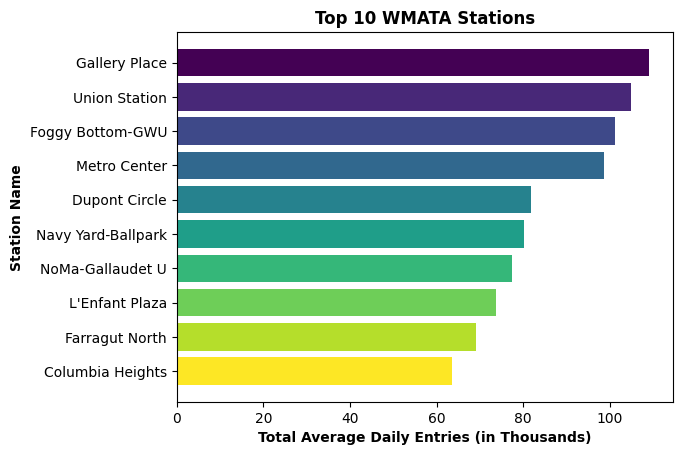

In [22]:
#bar graph of top ten stations across all dates and time periods
colors = plt.cm.viridis(np.linspace(0, 1, len(top_ten_stations)))
plt.barh(top_ten_stations['Station Name'], top_ten_stations['Avg Daily Entries (in Thousands)'], color=colors)
plt.gca().invert_yaxis()
plt.xlabel('Total Average Daily Entries (in Thousands)', fontweight='bold')
plt.ylabel('Station Name', fontweight='bold')
plt.title('Top 10 WMATA Stations', fontweight='bold', fontsize=12)

In [23]:
#how many are used by many federal workers (close to federal buildings)
top_ten_stations['Station Name'].unique

<bound method Series.unique of 38         Gallery Place
86         Union Station
33      Foggy Bottom-GWU
55          Metro Center
25         Dupont Circle
59    Navy Yard-Ballpark
62      NoMa-Gallaudet U
49        L'Enfant Plaza
29        Farragut North
17      Columbia Heights
Name: Station Name, dtype: object>

In [24]:
#use double quotes to include L'Enfant Plaza
federal_stations = [
    "Federal Triangle", "Federal Center SW", "L'Enfant Plaza", "Smithsonian",
    "Judiciary Square", "Capitol South", "Union Station", "Metro Center",
    "McPherson Sq", "Foggy Bottom-GWU", "NoMa-Gallaudet U"
]
fed_total = sep04[sep04['Station Name'].isin(federal_stations)]['Avg Daily Entries (in Thousands)'].sum()

In [25]:
fed_total

98.7

In [26]:
student_stations = [
    "Foggy Bottom-GWU", "NoMa-Gallaudet U", "Virginia Sq-GMU", "College Park-U of Md",
    "Tenleytown-AU", "Van Ness-UDC", "Shaw-Howard U", "Brookland-CUA", "Ballston-MU"
]
student_total = sep04[sep04['Station Name'].isin(student_stations)]['Avg Daily Entries (in Thousands)'].sum()

In [27]:
student_total

57.199999999999996

In [28]:
#calculated ridership totals for 2014 & 2019 by taking WMATA Station Entries Dashboard and using excel functions to take sum of same station groups
years = ['2014', '2019', '2024']
total_fed_ridership = [163, 158.6, 98.7]
total_student_ridership = [76.5, 75.3, 57.2]
colors = ['navy', 'navy', 'red']

In [29]:
1 - (98.7/163)

0.3944785276073619

In [30]:
1 - (57.2/76.5)

0.2522875816993464

Text(0, 0.5, 'Total Ridership (Avg Daily Entries)')

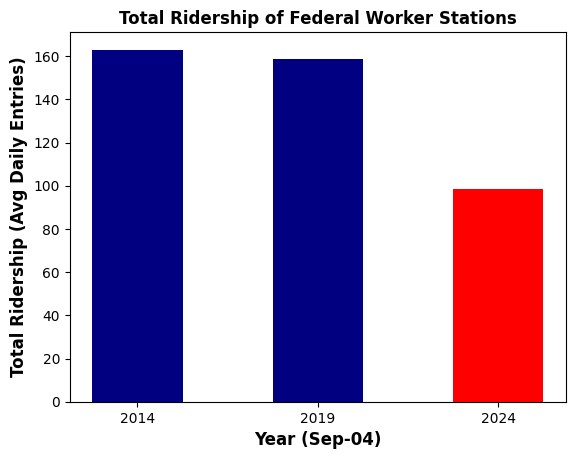

In [31]:
plt.bar(years, total_fed_ridership, color=colors, width=0.5)
plt.title('Total Ridership of Federal Worker Stations', fontsize=12, fontweight='bold')
plt.xlabel('Year (Sep-04)', fontsize=12, fontweight='bold')
plt.ylabel('Total Ridership (Avg Daily Entries)', fontsize=12, fontweight='bold')

Text(0, 0.5, 'Total Ridership (Avg Daily Entries)')

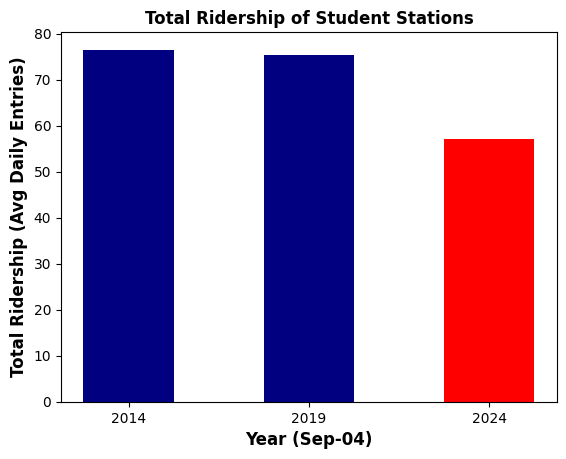

In [32]:
plt.bar(years, total_student_ridership, color=colors, width=0.5)
plt.title('Total Ridership of Student Stations', fontsize=12, fontweight='bold')
plt.xlabel('Year (Sep-04)', fontsize=12, fontweight='bold')
plt.ylabel('Total Ridership (Avg Daily Entries)', fontsize=12, fontweight='bold')